# Day059
## 降維方法-主成份分析(PCA)
### 爲什麼需要降低維度 ?
1. 壓縮資料: 有助於使用較少的 RAM 或 disk space，也有助於加速 learning algorithms。
2. 特徵組合及抽象化: 壓縮資料可進而組合出新的、抽象化的特徵，減少冗餘的資訊。
3. 資料視覺化: 特徵太多時，很難 visualize data，不容易觀察資料，把資料維度 (特徵) 降到 2 到 3 個，則能夠用一般的 2D 或 3D 圖表呈現資料。

### PCA - Principle Component Analysis
- 實務上我們經常遇到資料有非常多的 features，有些 features 可能高度相關，利用PCA可以把高度相關的 features 去除。
- PCA 透過計算 eigen value，eigen vector，可以將原本的 features 降維至特定的維度，其中新 features 為舊 features 的線性組合且新 features 彼此不相關。

### PCA 應用在監督式學習的注意事項
1. 不建議在早期時做，否則可能會丟失重要的 features 而 underfitting。
2. 可以在 optimization 階段時，考慮 PCA 並觀察運用了 PCA 後對準確度的影響。

### 結論
- 降低維度可以幫助我們壓縮及丟棄無用資訊、抽象化及組合新特徵、呈現高維數據。常用的算法爲PCA。
- 在維度太大發生 overfitting 的情況下，可以嘗試用 PCA 組成的特徵來做監督式學習，但不建議一開始就做。

## 範例
#### 載入套件

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition, datasets

np.random.seed(5)
%matplotlib inline

#### 載入 iris 資料集

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

#### 設定 模型 估計參數

In [3]:
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

#### 資料建模 並 視覺化 結果

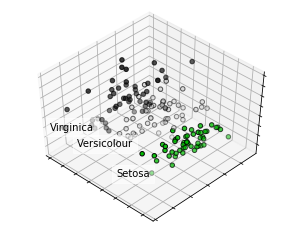

In [4]:
pca.fit(X)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA

In [5]:
digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

載入 相關套件 並 執行 PCA 實驗 ...

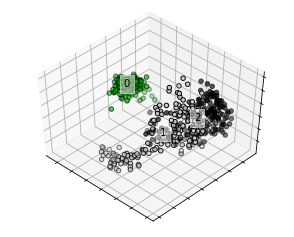

In [6]:
pca.fit(X)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

for name, label in [('0', 0), ('1', 1), ('2', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()